In [45]:
import matplotlib.pyplot as plt
import numpy as np
import re
import ast 
import torch

In [46]:
def test_val_extractor(file_name):    
    # get accuracy from sparsity.txt
    test_val_accumulator = list()
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if i == 0:
                line = ast.literal_eval(line)
                test_val_accumulator = line
                
    # return list of test accuracy 
    return test_val_accumulator

In [47]:
def selectivity_val_extractor(file_name):
    selectivity_average = 0
    selectivity_std = 0
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if i == 2:
                selectivity_average = ast.literal_eval(line)
            if i == 3:
                selectivity_std = ast.literal_eval(line)
    return selectivity_average, selectivity_std

In [48]:
def sparsity_val_extractor(file_name):
    sparsity_average = 0
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if i == 1:
                sparsity_average = ast.literal_eval(line)
    return sparsity_average

In [49]:
def all_plotter(original_test, original_sparsity, original_selectivity, single_test, single_sparsity, single_selectivity, pair_test, pair_sparsity, pair_selectivity, fives_test, fives_sparsity, fives_selectivity, location='best'):
    fig, ax = plt.subplots(figsize=(7, 7))
    
    ax.plot(np.linspace(0.0, 30, num=30), original_test, label='original_test', c = 'salmon')
    ax.plot(np.linspace(0.0, 30, num=30), original_sparsity, label='original_sparsity', c = 'red')
    ax.plot(np.linspace(0.0, 30, num=30), original_selectivity, label='original_selectivity', c = 'darkred')
    
    ax.plot(np.linspace(0.0, 30, num=30), single_test, label='single_test', c='lime')
    ax.plot(np.linspace(0.0, 30, num=30), single_sparsity, label='single_sparsity', c='green')
    ax.plot(np.linspace(0.0, 30, num=30), single_selectivity, label='single_selectivity', c='darkgreen')
    
    ax.plot(np.linspace(0.0, 30, num=30), pair_test, label='pair_test', c='blue')
    ax.plot(np.linspace(0.0, 30, num=30), pair_sparsity, label='pair_sparsity', c='mediumblue')
    ax.plot(np.linspace(0.0, 30, num=30), pair_selectivity, label='pair_selectivity', c='darkblue')
    
    ax.plot(np.linspace(0.0, 30, num=30), fives_test, label='fives_test', c='yellow')
    ax.plot(np.linspace(0.0, 30, num=30), fives_sparsity, label='fives_sparsity', c='goldenrod')
    ax.plot(np.linspace(0.0, 30, num=30), fives_selectivity, label='fives_selectivity', c='darkgoldenrod')
    
    ax.set_ylim([-0.2,1.2])
    ax.grid()
    ax.legend(bbox_to_anchor=(1, 0.5))
    plt.show()

# Graph format

In [50]:
def plotter(optimizer_name, flag=False): 
    ori_ta = test_val_extractor(f"original/sparsity_selectivity_4_optim_{optimizer_name}.txt")
    ori_sparsity = sparsity_val_extractor(f"original/sparsity_selectivity_4_optim_{optimizer_name}.txt")
    ori_selectivity_avg, ori_selectivity_std = selectivity_val_extractor(f"original/sparsity_selectivity_4_optim_{optimizer_name}.txt")

    single_ta = test_val_extractor(f"single/sparsity_selectivity_4_optim_single_{optimizer_name}.txt")
    single_sparsity = sparsity_val_extractor(f"single/sparsity_selectivity_4_optim_single_{optimizer_name}.txt")
    single_selectivity_avg, single_selectivity_std = selectivity_val_extractor(f"single/sparsity_selectivity_4_optim_single_{optimizer_name}.txt")

    pair_ta = test_val_extractor(f"pair/sparsity_selectivity_4_optim_pair_{optimizer_name}.txt")
    pair_sparsity = sparsity_val_extractor(f"pair/sparsity_selectivity_4_optim_pair_{optimizer_name}.txt")
    pair_selectivity_avg, pair_selectivity_std = selectivity_val_extractor(f"pair/sparsity_selectivity_4_optim_pair_{optimizer_name}.txt")
    
    fives_ta = test_val_extractor(f"5s/sparsity_selectivity_4_optim_5_nums_{optimizer_name}.txt")
    fives_sparsity = sparsity_val_extractor(f"5s/sparsity_selectivity_4_optim_5_nums_{optimizer_name}.txt")
    fives_selectivity_avg, fives_selectivity_std = selectivity_val_extractor(f"5s/sparsity_selectivity_4_optim_5_nums_{optimizer_name}.txt")
    
    assert len(ori_sparsity) == len(single_sparsity) == len(pair_sparsity) == len(fives_sparsity) == len(ori_selectivity_avg)
    assert len(ori_selectivity_avg) == len(single_selectivity_avg) == len(pair_selectivity_avg) == len(fives_selectivity_avg) == len(ori_sparsity)
    
    if flag==False:
        all_plotter(ori_ta, ori_sparsity, ori_selectivity_avg, single_ta, single_sparsity, single_selectivity_avg, pair_ta, pair_sparsity, pair_selectivity_avg, fives_ta, fives_sparsity, fives_selectivity_avg)
    else:
        return ori_ta, ori_sparsity, ori_selectivity_avg, ori_selectivity_std, single_ta, single_sparsity, single_selectivity_avg, single_selectivity_std, pair_ta, pair_sparsity, pair_selectivity_avg, pair_selectivity_std, fives_ta, fives_sparsity, fives_selectivity_avg, fives_selectivity_std

In [51]:
ori_ta_sgd,      ori_sparsity_sgd,      ori_selectivity_avg_sgd,      ori_selectivity_std_sgd,      single_ta_sgd,      single_sparsity_sgd,      single_selectivity_avg_sgd,      single_selectivity_std_sgd,      pair_ta_sgd,      pair_sparsity_sgd,      pair_selectivity_avg_sgd,      pair_selectivity_std_sgd,      fives_ta_sgd,      fives_sparsity_sgd,      fives_selectivity_avg_sgd,      fives_selectivity_std_sgd = plotter('SGD', flag=True)
ori_ta_adadelta, ori_sparsity_adadelta, ori_selectivity_avg_adadelta, ori_selectivity_std_adadelta, single_ta_adadelta, single_sparsity_adadelta, single_selectivity_avg_adadelta, single_selectivity_std_adadelta, pair_ta_adadelta, pair_sparsity_adadelta, pair_selectivity_avg_adadelta, pair_selectivity_std_adadelta, fives_ta_adadelta, fives_sparsity_adadelta, fives_selectivity_avg_adadelta, fives_selectivity_std_adadelta = plotter('Adadelta', flag=True)
ori_ta_adagrad,  ori_sparsity_adagrad,  ori_selectivity_avg_adagrad,  ori_selectivity_std_adagrad,  single_ta_adagrad,  single_sparsity_adagrad,  single_selectivity_avg_adagrad,  single_selectivity_std_adagrad,  pair_ta_adagrad,  pair_sparsity_adagrad,  pair_selectivity_avg_adagrad,  pair_selectivity_std_adagrad,  fives_ta_adagrad,  fives_sparsity_adagrad,  fives_selectivity_avg_adagrad,  fives_selectivity_std_adagrad = plotter('Adagrad', flag=True)
ori_ta_adam,     ori_sparsity_adam,     ori_selectivity_avg_adam,     ori_selectivity_std_adam,     single_ta_adam,     single_sparsity_adam,     single_selectivity_avg_adam,     single_selectivity_std_adam,     pair_ta_adam,     pair_sparsity_adam,     pair_selectivity_avg_adam,     pair_selectivity_std_adam,     fives_ta_adam,     fives_sparsity_adam,     fives_selectivity_avg_adam,     fives_selectivity_std_adam = plotter('Adam', flag=True)

In [52]:
bs10_ta_sgd = test_val_extractor('bs10_sparsity_selectivity_4_optim_single_SGD.txt')
bs10_spar_sgd = sparsity_val_extractor('bs10_sparsity_selectivity_4_optim_single_SGD.txt')
bs10_selec_avg_sgd, bs10_selec_std_sgd = selectivity_val_extractor('bs10_sparsity_selectivity_4_optim_single_SGD.txt')

bs10_ta_adagrad = test_val_extractor('bs10_sparsity_selectivity_4_optim_single_Adagrad.txt')
bs10_spar_adagrad = sparsity_val_extractor('bs10_sparsity_selectivity_4_optim_single_Adagrad.txt')
bs10_selec_avg_adagrad, bs10_selec_std_adagrad = selectivity_val_extractor('bs10_sparsity_selectivity_4_optim_single_Adagrad.txt')

bs10_ta_adadelta = test_val_extractor('bs10_sparsity_selectivity_4_optim_single_Adadelta.txt')
bs10_spar_adadelta = sparsity_val_extractor('bs10_sparsity_selectivity_4_optim_single_Adadelta.txt')
bs10_selec_avg_adadelta, bs10_selec_std_adadelta = selectivity_val_extractor('bs10_sparsity_selectivity_4_optim_single_Adadelta.txt')

bs10_ta_adam = test_val_extractor('bs10_sparsity_selectivity_4_optim_single_Adam.txt')
bs10_spar_adam = sparsity_val_extractor('bs10_sparsity_selectivity_4_optim_single_Adam.txt')
bs10_selec_avg_adam, bs10_selec_std_adam = selectivity_val_extractor('bs10_sparsity_selectivity_4_optim_single_Adam.txt')

In [53]:
sub10_ta_sgd = test_val_extractor('10subsebatch1_sparsity_selectivity_SGD.txt')
sub10_spar_sgd = sparsity_val_extractor('10subsebatch1_sparsity_selectivity_SGD.txt')
sub10_selec_avg_sgd, bs10_selec_std_sgd = selectivity_val_extractor('10subsebatch1_sparsity_selectivity_SGD.txt')

sub10_ta_adagrad = test_val_extractor('10subsebatch1_sparsity_selectivity_Adagrad.txt')
sub10_spar_adagrad = sparsity_val_extractor('10subsebatch1_sparsity_selectivity_Adagrad.txt')
sub10_selec_avg_adagrad, bs10_selec_std_adagrad = selectivity_val_extractor('10subsebatch1_sparsity_selectivity_Adagrad.txt')

sub10_ta_adadelta = test_val_extractor('10subsebatch1_sparsity_selectivity_Adadelta.txt')
sub10_spar_adadelta = sparsity_val_extractor('10subsebatch1_sparsity_selectivity_Adadelta.txt')
sub10_selec_avg_adadelta, bs10_selec_std_adadelta = selectivity_val_extractor('10subsebatch1_sparsity_selectivity_Adadelta.txt')

sub10_ta_adam = test_val_extractor('10subsebatch1_sparsity_selectivity_Adam.txt')
sub10_spar_adam = sparsity_val_extractor('10subsebatch1_sparsity_selectivity_Adam.txt')
sub10_selec_avg_adam, bs10_selec_std_adam = selectivity_val_extractor('10subsebatch1_sparsity_selectivity_Adam.txt')

[]

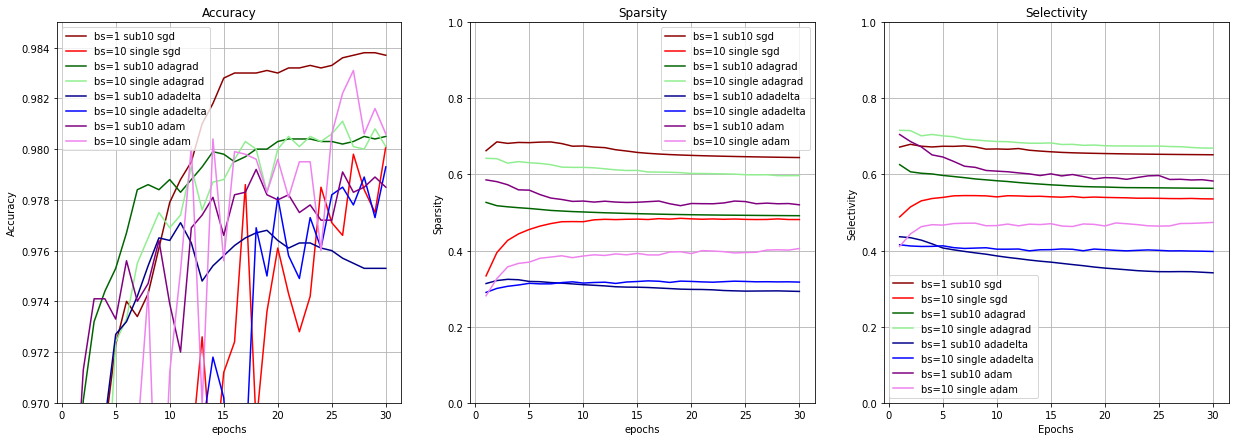

In [77]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 7))

# accuracy 
ax1.plot(np.linspace(1, 30, 30), sub10_ta_sgd, label='bs=1 sub10 sgd', c='darkred')
ax1.plot(np.linspace(1, 30, 30), bs10_ta_sgd, label='bs=10 single sgd', c='red')

ax1.plot(np.linspace(1, 30, 30), sub10_ta_adagrad, label='bs=1 sub10 adagrad', c='darkgreen')
ax1.plot(np.linspace(1, 30, 30), bs10_ta_adagrad, label='bs=10 single adagrad', c='lightgreen')

ax1.plot(np.linspace(1, 30, 30), sub10_ta_adadelta, label='bs=1 sub10 adadelta', c='darkblue')
ax1.plot(np.linspace(1, 30, 30), bs10_ta_adadelta, label='bs=10 single adadelta', c='blue')

ax1.plot(np.linspace(1, 30, 30), sub10_ta_adam, label='bs=1 sub10 adam', c='purple')
ax1.plot(np.linspace(1, 30, 30), bs10_ta_adam, label='bs=10 single adam', c='violet')

ax1.grid()
ax1.set_xlabel('epochs')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy')
ax1.legend()

ax1.set_ylim([0.97, 0.985])

# sparsity 
ax2.plot(np.linspace(1, 30, 30), sub10_spar_sgd, label='bs=1 sub10 sgd', c='darkred')
ax2.plot(np.linspace(1, 30, 30), bs10_spar_sgd, label='bs=10 single sgd', c='red')

ax2.plot(np.linspace(1, 30, 30), sub10_spar_adagrad, label='bs=1 sub10 adagrad', c='darkgreen')
ax2.plot(np.linspace(1, 30, 30), bs10_spar_adagrad, label='bs=10 single adagrad', c='lightgreen')

ax2.plot(np.linspace(1, 30, 30), sub10_spar_adadelta, label='bs=1 sub10 adadelta', c='darkblue')
ax2.plot(np.linspace(1, 30, 30), bs10_spar_adadelta, label='bs=10 single adadelta', c='blue')

ax2.plot(np.linspace(1, 30, 30), sub10_spar_adam, label='bs=1 sub10 adam', c='purple')
ax2.plot(np.linspace(1, 30, 30), bs10_spar_adam, label='bs=10 single adam', c='violet')

ax2.grid()
ax2.set_xlabel('epochs')
ax2.set_ylabel('Sparsity')
ax2.set_title('Sparsity')
ax2.legend()

ax2.set_ylim([0, 1])

# selectivity
ax3.plot(np.linspace(1, 30, 30), sub10_selec_avg_sgd, label='bs=1 sub10 sgd', c='darkred')
ax3.plot(np.linspace(1, 30, 30), bs10_selec_avg_sgd, label='bs=10 single sgd', c='red')

ax3.plot(np.linspace(1, 30, 30), sub10_selec_avg_adagrad, label='bs=1 sub10 adagrad', c='darkgreen')
ax3.plot(np.linspace(1, 30, 30), bs10_selec_avg_adagrad, label='bs=10 single adagrad', c='lightgreen')

ax3.plot(np.linspace(1, 30, 30), sub10_selec_avg_adadelta, label='bs=1 sub10 adadelta', c='darkblue')
ax3.plot(np.linspace(1, 30, 30), bs10_selec_avg_adadelta, label='bs=10 single adadelta', c='blue')

ax3.plot(np.linspace(1, 30, 30), sub10_selec_avg_adam, label='bs=1 sub10 adam', c='purple')
ax3.plot(np.linspace(1, 30, 30), bs10_selec_avg_adam, label='bs=10 single adam', c='violet')

ax3.grid()
ax3.set_xlabel('Epochs')
ax3.set_ylabel('Selectivity')
ax3.set_title('Selectivity')
ax3.legend()

ax3.set_ylim([0, 1])

plt.plot()

# Subplots

In [59]:
def suplots(ori_sgd, ori_adadelta, ori_adagrad, ori_adam,
            single_sgd, single_adadelta, single_adagrad, single_adam,
            pair_sgd, pair_adadelta, pair_adagrad, pair_adam,
            fives_sgd, fives_adadelta, fives_adagrad, fives_adam):
    
    assert len(ori_sgd) == len(single_adadelta) == len(pair_adadelta) == len(fives_adam)
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15,15))
    
    ax1.plot(np.linspace(0, 30, 30), ori_sgd, label='SGD original', c='red')
    ax1.plot(np.linspace(0, 30, 30), ori_adadelta, label='Adadelta original', c='blue')
    ax1.plot(np.linspace(0, 30, 30), ori_adagrad, label='Adagrad original', c='green')
    ax1.plot(np.linspace(0, 30, 30), ori_adam, label='Adam original', c='violet')
    ax1.set_ylim([-0.1,1.1])
    ax1.set_title('Random (Original)')
    ax1.grid()
    ax1.legend(loc='best')

    ax2.plot(np.linspace(0, 30, 30), fives_sgd, label='SGD fives', c='red')
    ax2.plot(np.linspace(0, 30, 30), fives_adadelta, label='Adadelta fives', c='blue')
    ax2.plot(np.linspace(0, 30, 30), fives_adagrad, label='Adagrad fives', c='green')
    ax2.plot(np.linspace(0, 30, 30), fives_adam, label='Adam fives', c='violet')
    ax2.set_ylim([-0.1,1.1])
    ax2.set_title('5s')
    ax2.grid()
    ax2.legend(loc='best')
    
    ax3.plot(np.linspace(0, 30, 30), pair_sgd, label='SGD pair', c='red')
    ax3.plot(np.linspace(0, 30, 30), pair_adadelta, label='Adadelta pair', c='blue')
    ax3.plot(np.linspace(0, 30, 30), pair_adagrad, label='Adagrad pair', c='green')
    ax3.plot(np.linspace(0, 30, 30), pair_adam, label='Adam pair', c='violet')
    ax3.set_ylim([-0.1,1.1])
    ax3.set_title('Pair')
    ax3.grid()
    ax3.legend(loc='best')
    
    ax4.plot(np.linspace(0, 30, 30), single_sgd, label='SGD single', c='red')
    ax4.plot(np.linspace(0, 30, 30), single_adadelta, label='Adadelta single', c='blue')
    ax4.plot(np.linspace(0, 30, 30), single_adagrad, label='Adagrad single', c='green')
    ax4.plot(np.linspace(0, 30, 30), single_adam, label='Adam single', c='violet')
    ax4.set_ylim([-0.1,1.1])
    ax4.set_title('Single')
    ax4.grid()
    ax4.legend(loc='best')
    
    plt.show()

# Compare

In [60]:
def compare(optimizer_name, flag=True):
    print(f'\n==============={optimizer_name}===============')
    ori_ta, ori_sparsity, ori_selectivity_avg, ori_selectivity_std, single_ta, single_sparsity, single_selectivity_avg, single_selectivity_std, pair_ta, pair_sparsity, pair_selectivity_avg, pair_selectivity_std, _, _, _, _ = plotter(optimizer_name, flag=True)
    print(f"{optimizer_name} original: Test acc={ori_ta[-1]:.3f}, Spar={ori_sparsity[-1]:.3f}, Selec avg={ori_selectivity_avg[-1]:.3f}, Selec std={ori_selectivity_std[-1]:.3f}")
    print(f"{optimizer_name} single: Test acc={single_ta[-1]:.3f}, Spar={single_sparsity[-1]:.3f}, Selec avg={single_selectivity_avg[-1]:.3f}, Selec std={single_selectivity_std[-1]:.3f}")
    print(f"{optimizer_name} pair: Test acc={pair_ta[-1]:.3f}, Spar={pair_sparsity[-1]:.3f}, Selec avg={pair_selectivity_avg[-1]:.3f}, Selec std={pair_selectivity_std[-1]:.3f}")
    print()
    print("< Compare with single >")
    print()
    print("test deviation: single - original:", single_ta[-1] - ori_ta[-1])
    print("sparsity deviation: single - original:", single_sparsity[-1] - ori_sparsity[-1])
    print("selectivity deviation: single - original:", single_selectivity_avg[-1] - ori_selectivity_avg[-1])
    print()
    print("test % difference: sorted / original:", (single_ta[-1] / ori_ta[-1]) * 100)
    print("sparsity % difference: sorted / original:", (single_sparsity[-1] / ori_sparsity[-1]) * 100)
    print("selectivity % difference: sorted / original:", (single_selectivity_avg[-1] / ori_selectivity_avg[-1]) * 100)
    print()
    print("< Compare with pair >")
    print()
    print("test deviation: pair - original:", pair_ta[-1] - ori_ta[-1])
    print("sparsity deviation: pair - original:", pair_sparsity[-1] - ori_sparsity[-1])
    print("selectivity deviation: pair - original:", pair_selectivity_avg[-1] - ori_selectivity_avg[-1])
    print()
    print("test % difference: pair / original:", (pair_ta[-1] / ori_ta[-1]) * 100)
    print("sparsity % difference: pair / original:", (pair_sparsity[-1] / ori_sparsity[-1]) * 100)
    print("selectivity % difference: pair / original:", (pair_selectivity_avg[-1] / ori_selectivity_avg[-1]) * 100)
    print()
    

In [61]:
# need to add fives
compare('SGD')
compare('Adadelta')
compare('Adagrad')
compare('Adam')


===============SGD===============
SGD original: Test acc=0.971, Spar=0.222, Selec avg=0.320, Selec std=0.174
SGD single: Test acc=0.957, Spar=0.426, Selec avg=0.514, Selec std=0.146
SGD pair: Test acc=0.962, Spar=0.361, Selec avg=0.476, Selec std=0.147

< Compare with single >

test deviation: single - original: -0.014000000000000012
sparsity deviation: single - original: 0.20330238342285156
selectivity deviation: single - original: 0.19389655473441758

test % difference: sorted / original: 98.5583359077335
sparsity % difference: sorted / original: 191.42972330218885
selectivity % difference: sorted / original: 160.60539511088015

< Compare with pair >

test deviation: pair - original: -0.009000000000000008
sparsity deviation: pair - original: 0.1383112668991089
selectivity deviation: pair - original: 0.1557813526119749

test % difference: pair / original: 99.07321594068583
sparsity % difference: pair / original: 162.20173442757243
selectivity % difference: pair / original: 148.691893

# subplots - test: original vs single

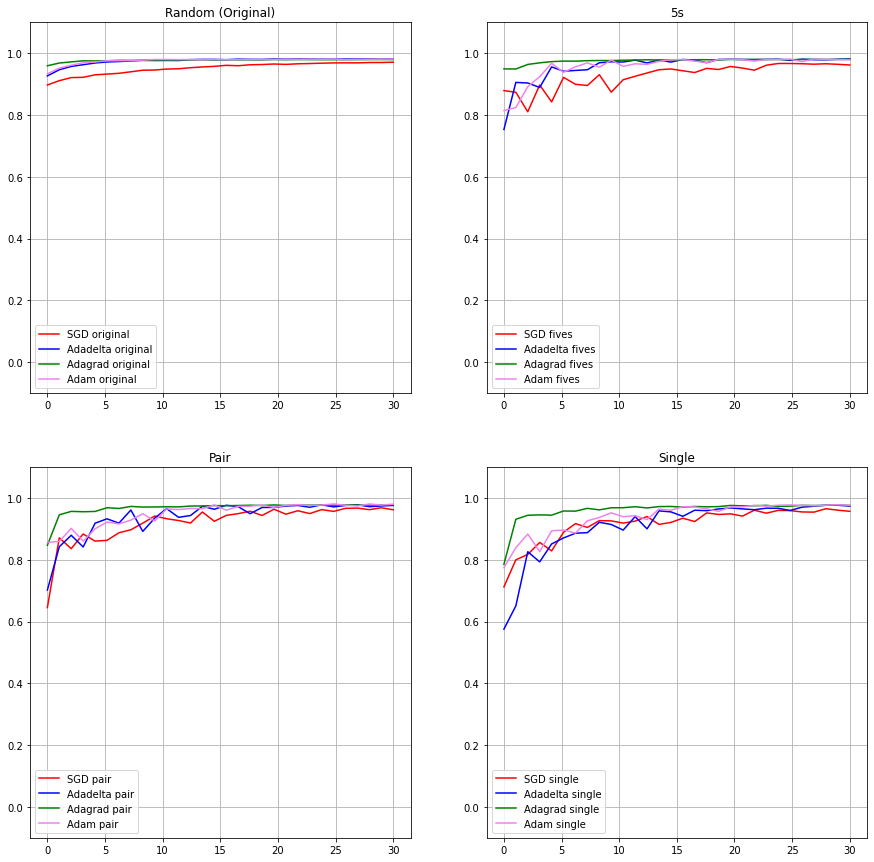

In [62]:
suplots(ori_ta_sgd, ori_ta_adadelta, ori_ta_adagrad, ori_ta_adam,
        single_ta_sgd, single_ta_adadelta, single_ta_adagrad, single_ta_adam,
        pair_ta_sgd, pair_ta_adadelta, pair_ta_adagrad, pair_ta_adam,
        fives_ta_sgd, fives_ta_adadelta, fives_ta_adagrad, fives_ta_adam,
        )

# subplots - sparsity

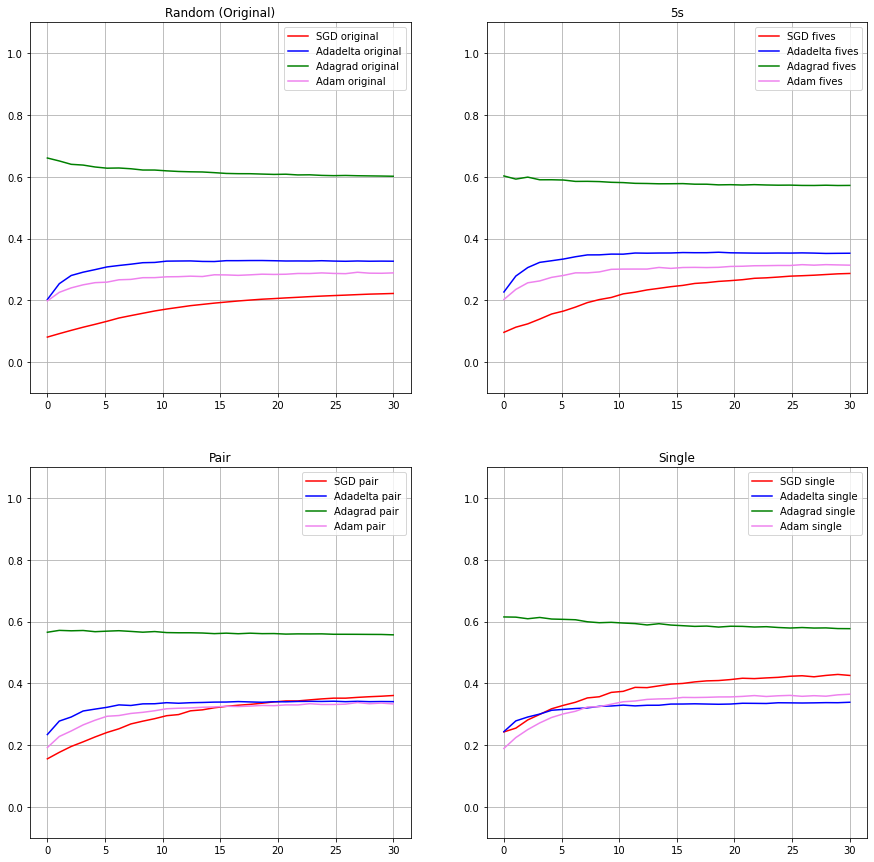

In [63]:
suplots(ori_sparsity_sgd, ori_sparsity_adadelta, ori_sparsity_adagrad, ori_sparsity_adam,
        single_sparsity_sgd, single_sparsity_adadelta, single_sparsity_adagrad, single_sparsity_adam,
        pair_sparsity_sgd, pair_sparsity_adadelta, pair_sparsity_adagrad, pair_sparsity_adam,
        fives_sparsity_sgd, fives_sparsity_adadelta, fives_sparsity_adagrad, fives_sparsity_adam,
        )

# subplots - selectivity

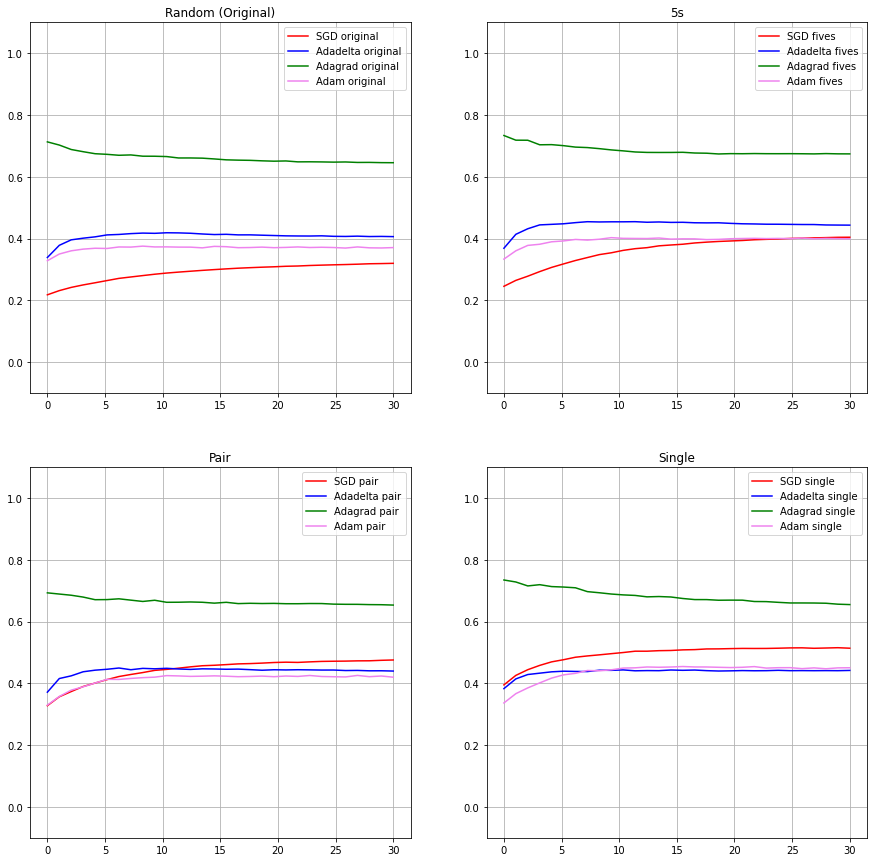

In [64]:
suplots(ori_selectivity_avg_sgd, ori_selectivity_avg_adadelta, ori_selectivity_avg_adagrad, ori_selectivity_avg_adam,
        single_selectivity_avg_sgd, single_selectivity_avg_adadelta, single_selectivity_avg_adagrad, single_selectivity_avg_adam,
        pair_selectivity_avg_sgd, pair_selectivity_avg_adadelta, pair_selectivity_avg_adagrad, pair_selectivity_avg_adam,
        fives_selectivity_avg_sgd, fives_selectivity_avg_adadelta, fives_selectivity_avg_adagrad, fives_selectivity_avg_adam,
        )

# SGD

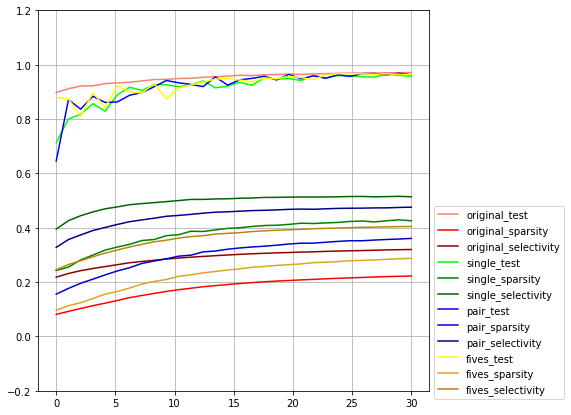

In [65]:
plotter('SGD')

# Adadelta

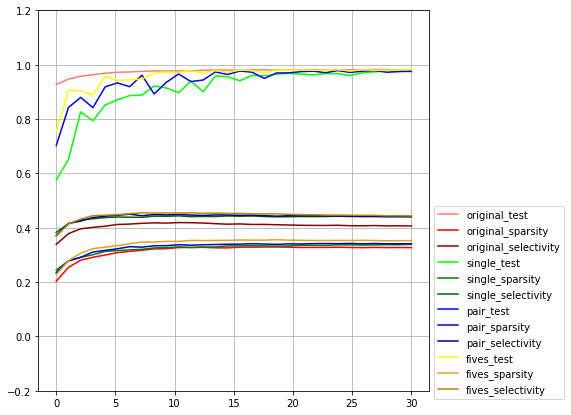

In [66]:
plotter('Adadelta')

# Adagrad

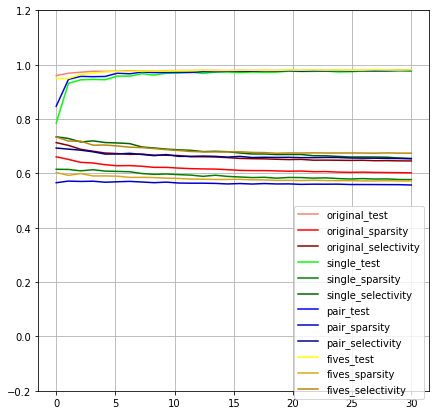

In [67]:
plotter('Adagrad')

# Adam

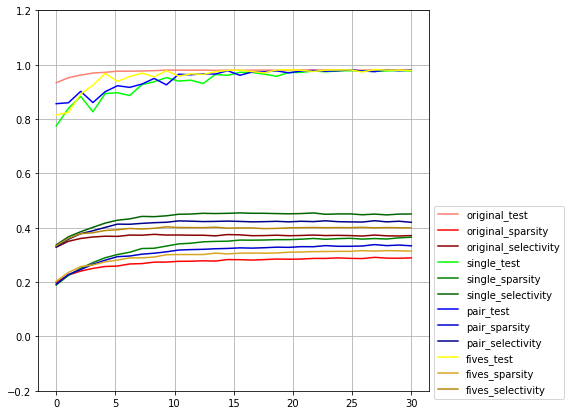

In [68]:
plotter('Adam')

# plot all in one

In [69]:
ori_ta_sgd,      ori_sparsity_sgd,      ori_selectivity_avg_sgd,      ori_selectivity_std_sgd,      single_ta_sgd,      single_sparsity_sgd,      single_selectivity_avg_sgd,      single_selectivity_std_sgd,      pair_ta_sgd,      pair_sparsity_sgd,      pair_selectivity_avg_sgd,      pair_selectivity_std_sgd,      fives_ta_sgd,      fives_sparsity_sgd,      fives_selectivity_avg_sgd,      fives_selectivity_std_sgd = plotter('SGD', flag=True)
ori_ta_adadelta, ori_sparsity_adadelta, ori_selectivity_avg_adadelta, ori_selectivity_std_adadelta, single_ta_adadelta, single_sparsity_adadelta, single_selectivity_avg_adadelta, single_selectivity_std_adadelta, pair_ta_adadelta, pair_sparsity_adadelta, pair_selectivity_avg_adadelta, pair_selectivity_std_adadelta, fives_ta_adadelta, fives_sparsity_adadelta, fives_selectivity_avg_adadelta, fives_selectivity_std_adadelta = plotter('Adadelta', flag=True)
ori_ta_adagrad,  ori_sparsity_adagrad,  ori_selectivity_avg_adagrad,  ori_selectivity_std_adagrad,  single_ta_adagrad,  single_sparsity_adagrad,  single_selectivity_avg_adagrad,  single_selectivity_std_adagrad,  pair_ta_adagrad,  pair_sparsity_adagrad,  pair_selectivity_avg_adagrad,  pair_selectivity_std_adagrad,  fives_ta_adagrad,  fives_sparsity_adagrad,  fives_selectivity_avg_adagrad,  fives_selectivity_std_adagrad = plotter('Adagrad', flag=True)
ori_ta_adam,     ori_sparsity_adam,     ori_selectivity_avg_adam,     ori_selectivity_std_adam,     single_ta_adam,     single_sparsity_adam,     single_selectivity_avg_adam,     single_selectivity_std_adam,     pair_ta_adam,     pair_sparsity_adam,     pair_selectivity_avg_adam,     pair_selectivity_std_adam,     fives_ta_adam,     fives_sparsity_adam,     fives_selectivity_avg_adam,     fives_selectivity_std_adam = plotter('Adam', flag=True)

In [70]:
fives_ta_sgd = fives_ta_sgd[-1]
fives_ta_adadelta = fives_ta_adadelta[-1]
fives_ta_adagrad = fives_ta_adagrad[-1]
fives_ta_adam = fives_ta_adam[-1]

fives_sparsity_sgd = fives_sparsity_sgd[-1]
fives_sparsity_adadelta = fives_sparsity_adadelta[-1]
fives_sparsity_adagrad = fives_sparsity_adagrad[-1]
fives_sparsity_adam = fives_sparsity_adam[-1]

fives_selectivity_avg_sgd = fives_selectivity_avg_sgd[-1]
fives_selectivity_avg_adadelta = fives_selectivity_avg_adadelta[-1]
fives_selectivity_avg_adagrad = fives_selectivity_avg_adagrad[-1]
fives_selectivity_avg_adam = fives_selectivity_avg_adam[-1]

fives_selectivity_std_sgd = fives_selectivity_std_sgd[-1]
fives_selectivity_std_adadelta = fives_selectivity_std_adadelta[-1]
fives_selectivity_std_adagrad = fives_selectivity_std_adagrad[-1]
fives_selectivity_std_adam = fives_selectivity_std_adam[-1]

pair_ta_sgd = pair_ta_sgd[-1]
pair_ta_adadelta = pair_ta_adadelta[-1]
pair_ta_adagrad = pair_ta_adagrad[-1]
pair_ta_adam = pair_ta_adam[-1]

pair_sparsity_sgd = pair_sparsity_sgd[-1]
pair_sparsity_adadelta = pair_sparsity_adadelta[-1]
pair_sparsity_adagrad = pair_sparsity_adagrad[-1]
pair_sparsity_adam = pair_sparsity_adam[-1]

pair_selectivity_avg_sgd = pair_selectivity_avg_sgd[-1]
pair_selectivity_avg_adadelta = pair_selectivity_avg_adadelta[-1]
pair_selectivity_avg_adagrad = pair_selectivity_avg_adagrad[-1]
pair_selectivity_avg_adam = pair_selectivity_avg_adam[-1]

pair_selectivity_std_sgd = pair_selectivity_std_sgd[-1]
pair_selectivity_std_adadelta = pair_selectivity_std_adadelta[-1]
pair_selectivity_std_adagrad = pair_selectivity_std_adagrad[-1]
pair_selectivity_std_adam = pair_selectivity_std_adam[-1]

ori_ta_sgd = ori_ta_sgd[-1]
ori_sparsity_sgd = ori_sparsity_sgd[-1]
ori_selectivity_avg_sgd = ori_selectivity_avg_sgd[-1]
ori_selectivity_std_sgd = ori_selectivity_std_sgd[-1]

ori_ta_adadelta = ori_ta_adadelta[-1]
ori_sparsity_adadelta = ori_sparsity_adadelta[-1]
ori_selectivity_avg_adadelta = ori_selectivity_avg_adadelta[-1]
ori_selectivity_std_adadelta = ori_selectivity_std_adadelta[-1]

ori_ta_adagrad = ori_ta_adagrad[-1]
ori_sparsity_adagrad = ori_sparsity_adagrad[-1]
ori_selectivity_avg_adagrad = ori_selectivity_avg_adagrad[-1]
ori_selectivity_std_adagrad = ori_selectivity_std_adagrad[-1]

ori_ta_adam = ori_ta_adam[-1]
ori_sparsity_adam = ori_sparsity_adam[-1]
ori_selectivity_avg_adam = ori_selectivity_avg_adam[-1]
ori_selectivity_std_adam = ori_selectivity_std_adam[-1]

single_ta_sgd = single_ta_sgd[-1]
single_ta_adadelta = single_ta_adadelta[-1]
single_ta_adagrad = single_ta_adagrad[-1]
single_ta_adam = single_ta_adam[-1]

single_sparsity_sgd = single_sparsity_sgd[-1]
single_sparsity_adadelta = single_sparsity_adadelta[-1]
single_sparsity_adagrad = single_sparsity_adagrad[-1]
single_sparsity_adam = single_sparsity_adam[-1]

single_selectivity_avg_sgd = single_selectivity_avg_sgd[-1]
single_selectivity_avg_adadelta = single_selectivity_avg_adadelta[-1]
single_selectivity_avg_adagrad = single_selectivity_avg_adagrad[-1]
single_selectivity_avg_adam = single_selectivity_avg_adam[-1]

single_selectivity_std_sgd = single_selectivity_std_sgd[-1]
single_selectivity_std_adadelta = single_selectivity_std_adadelta[-1]
single_selectivity_std_adagrad = single_selectivity_std_adagrad[-1]
single_selectivity_std_adam = single_selectivity_std_adam[-1]

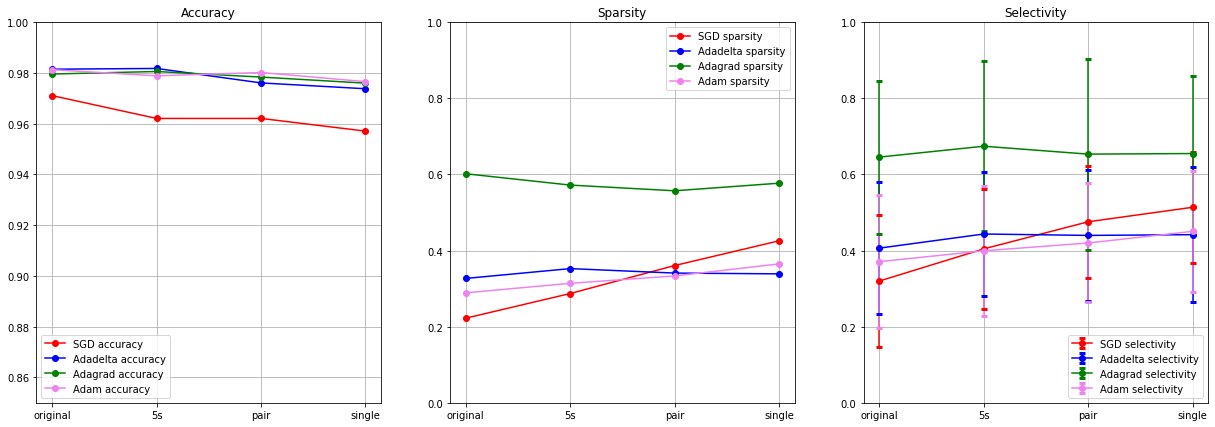

In [71]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 7))

# default setting for grpahs 
hl_ticks = ['original', '5s', 'pair', 'single']
ax1.set_xticks(np.linspace(1, 4, 4))
ax1.set_xticklabels(hl_ticks)

ax2.set_xticks(np.linspace(1, 4, 4))
ax2.set_xticklabels(hl_ticks)

ax3.set_xticks(np.linspace(1, 4, 4))
ax3.set_xticklabels(hl_ticks)

# accuracy
ax1.plot(np.linspace(1, 4, 4), [ori_ta_sgd, fives_ta_sgd, pair_ta_sgd, single_ta_sgd], 
         label='SGD accuracy', marker='o', c='red')
ax1.plot(np.linspace(1, 4, 4), [ori_ta_adadelta, fives_ta_adadelta, pair_ta_adadelta, single_ta_adadelta], 
         label='Adadelta accuracy', marker='o', c='blue')
ax1.plot(np.linspace(1, 4, 4), [ori_ta_adagrad, fives_ta_adagrad, pair_ta_adagrad, single_ta_adagrad], 
         label='Adagrad accuracy', marker='o', c='green')
ax1.plot(np.linspace(1, 4, 4), [ori_ta_adam, fives_ta_adam, pair_ta_adam, single_ta_adam], 
         label='Adam accuracy', marker='o', c='violet')

# sparsity
ax2.plot(np.linspace(1, 4, 4), [ori_sparsity_sgd, fives_sparsity_sgd, pair_sparsity_sgd, single_sparsity_sgd], 
         label='SGD sparsity', marker='o', c='red')
ax2.plot(np.linspace(1, 4, 4), [ori_sparsity_adadelta, fives_sparsity_adadelta, pair_sparsity_adadelta, single_sparsity_adadelta], 
         label='Adadelta sparsity', marker='o', c='blue')
ax2.plot(np.linspace(1, 4, 4), [ori_sparsity_adagrad, fives_sparsity_adagrad, pair_sparsity_adagrad, single_sparsity_adagrad], 
         label='Adagrad sparsity', marker='o', c='green')
ax2.plot(np.linspace(1, 4, 4), [ori_sparsity_adam, fives_sparsity_adam, pair_sparsity_adam, single_sparsity_adam], 
         label='Adam sparsity', marker='o', c='violet')

# selectivity
ax3.errorbar(np.linspace(1, 4, 4), [ori_selectivity_avg_sgd, fives_selectivity_avg_sgd, pair_selectivity_avg_sgd, single_selectivity_avg_sgd], 
             [ori_selectivity_std_sgd, fives_selectivity_std_sgd, pair_selectivity_std_sgd, single_selectivity_std_sgd], 
             capsize=3, capthick=3, marker='o', label='SGD selectivity', c='red')
ax3.errorbar(np.linspace(1, 4, 4), [ori_selectivity_avg_adadelta, fives_selectivity_avg_adadelta, pair_selectivity_avg_adadelta, single_selectivity_avg_adadelta], 
             [ori_selectivity_std_adadelta, fives_selectivity_std_adadelta, pair_selectivity_std_adadelta, single_selectivity_std_adadelta], 
             capsize=3, capthick=3, marker='o', label='Adadelta selectivity', c='blue')
ax3.errorbar(np.linspace(1, 4, 4), [ori_selectivity_avg_adagrad, fives_selectivity_avg_adagrad, pair_selectivity_avg_adagrad, single_selectivity_avg_adagrad], 
             [ori_selectivity_std_adagrad, fives_selectivity_std_adagrad, pair_selectivity_std_adagrad, single_selectivity_std_adagrad], 
             capsize=3, capthick=3, marker='o', label='Adagrad selectivity', c='green')
ax3.errorbar(np.linspace(1, 4, 4), [ori_selectivity_avg_adam, fives_selectivity_avg_adam, pair_selectivity_avg_adam, single_selectivity_avg_adam], 
             [ori_selectivity_std_adam, fives_selectivity_std_adam, pair_selectivity_std_adam, single_selectivity_std_adam], 
             capsize=3, capthick=3, marker='o', label='Adam selectivity', c='violet')

# setting legends
ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')

# setting titles 
ax1.set_title('Accuracy')
ax2.set_title('Sparsity')
ax3.set_title('Selectivity')

# setting y_lim
ax1.set_ylim([0.85,1.0]) # accuracy 
ax2.set_ylim([0,1.0])
ax3.set_ylim([0,1.0])

ax1.grid()
ax2.grid()
ax3.grid()

plt.show()


In [72]:
sgd_accs = [ori_ta_sgd,           fives_ta_sgd,      pair_ta_sgd,      single_ta_sgd]
adadelta_accs = [ori_ta_adadelta, fives_ta_adadelta, pair_ta_adadelta, single_ta_adadelta]
adagrad_accs = [ori_ta_adagrad,   fives_ta_adagrad,  pair_ta_adagrad,  single_ta_adagrad]
adam_accs = [ori_ta_adam,         fives_ta_adam,     pair_ta_adam,     single_ta_adam]

sgd_spars = [ori_sparsity_sgd,           fives_sparsity_sgd,      pair_sparsity_sgd,      single_sparsity_sgd]
adadelta_spars = [ori_sparsity_adadelta, fives_sparsity_adadelta, pair_sparsity_adadelta, single_sparsity_adadelta]
adagrad_spars = [ori_sparsity_adagrad,   fives_sparsity_adagrad,  pair_sparsity_adagrad,  single_sparsity_adagrad]
adam_spars = [ori_sparsity_adam,         fives_sparsity_adam,     pair_sparsity_adam,     single_sparsity_adam]

sgd_selecs = [ori_selectivity_avg_sgd,           fives_selectivity_avg_sgd,      pair_selectivity_avg_sgd,      single_selectivity_avg_sgd]
adadelta_selecs = [ori_selectivity_avg_adadelta, fives_selectivity_avg_adadelta, pair_selectivity_avg_adadelta, single_selectivity_avg_adadelta]
adagrad_selecs = [ori_selectivity_avg_adagrad,   fives_selectivity_avg_adagrad,  pair_selectivity_avg_adagrad,  single_selectivity_avg_adagrad]
adam_selecs = [ori_selectivity_avg_adam,         fives_selectivity_avg_adam,     pair_selectivity_avg_adam,     single_selectivity_avg_adam]

# Accuracy x Sparsity (or Selectivity)

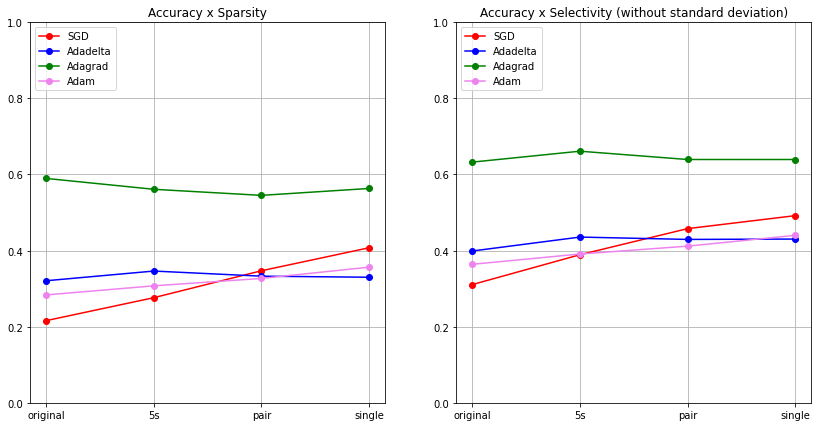

In [73]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7))

# default setting for grpahs 
hl_ticks = ['original', '5s', 'pair', 'single']
ax1.set_xticks(np.linspace(1, 4, 4))
ax1.set_xticklabels(hl_ticks)

ax2.set_xticks(np.linspace(1, 4, 4))
ax2.set_xticklabels(hl_ticks)

ax3.set_xticks(np.linspace(1, 4, 4))
ax3.set_xticklabels(hl_ticks)

# Accuracy x Sparsity 
ax1.plot(np.linspace(1, 4, 4), [a * b for a, b in zip(sgd_accs, sgd_spars)], 
         label='SGD', c='red', marker='o')
ax1.plot(np.linspace(1, 4, 4), [a * b for a, b in zip(adadelta_accs, adadelta_spars)], 
         label='Adadelta', c='blue', marker='o')
ax1.plot(np.linspace(1, 4, 4), [a * b for a, b in zip(adagrad_accs, adagrad_spars)], 
         label='Adagrad', c='green', marker='o')
ax1.plot(np.linspace(1, 4, 4), [a * b for a, b in zip(adam_accs, adam_spars)], 
         label='Adam', c='violet', marker='o')
ax1.set_ylim([0, 1.0])

ax1.set_title('Accuracy x Sparsity')
ax1.grid()
ax1.legend(loc='upper left')

# Accuracy x Selectivity   
ax2.plot(np.linspace(1, 4, 4), [a * b for a, b in zip(sgd_accs, sgd_selecs)], 
         label='SGD', c='red', marker='o')
ax2.plot(np.linspace(1, 4, 4), [a * b for a, b in zip(adadelta_accs, adadelta_selecs)], 
         label='Adadelta', c='blue', marker='o')
ax2.plot(np.linspace(1, 4, 4), [a * b for a, b in zip(adagrad_accs, adagrad_selecs)], 
         label='Adagrad', c='green', marker='o')
ax2.plot(np.linspace(1, 4, 4), [a * b for a, b in zip(adam_accs, adam_selecs)], 
         label='Adam', c='violet', marker='o')
ax2.set_ylim([0, 1])

ax2.set_title('Accuracy x Selectivity (without standard deviation)')
ax2.grid()
ax2.legend(loc='upper left')

plt.show()